**Model 1: P_hat = A_inv x (b + meu)**

In [ ]:
# K = 5   # Number of transmitter-receiver pairs

In [ ]:
# import numpy as np

# ## Function to generate an array of float values within a given range
# def generate_f_val(f_val_min, f_val_max, f_count):
#   f_val = []
#   for i in range(f_count):
#     f_val_temp = round(np.random.uniform(f_val_min, f_val_max),3)
#     f_val.append(f_val_temp)
#   return f_val

In [ ]:
# ## Variances for noise signals
# # https://www.youtube.com/watch?v=OA4viERrlzA&list=PLTv48TzNRhaKz0C-dCAwimXSypV_5UTxg
# # From 6:44 to 0:55
# # Power Spectral Density of Noise, N0 = 1e-14.4 W/Hz at room temperature
# # If Bandwidth, B = 10 MHz
# # Then the Noise Power or Noise Variance = N0 X B = 1e-7.4 W 

# # sigma_sqr_noise = generate_f_val(1.1e-2, 1.9e-2, K)
# sigma_sqr_noise = generate_f_val(1, 1, K)
# print(sigma_sqr_noise)

In [ ]:
# ## Minimum rate for the achievable SINR of multiple concurrent transmissions
# # SINR_P_min = generate_f_val(0.301, 0.305, K)
# SINR_P_min = generate_f_val(0.5, 0.5, K)
# print(SINR_P_min)

In [ ]:
# ## Replacing SINR with SINR = 0 for some receiver(s)
# indx_zero = np.array([3, 4])
# for i in range(len(indx_zero)):
#   SINR_P_min[indx_zero[i]] = 0
# print(SINR_P_min)

In [ ]:
# ## Maximum power allowed for transmission

# ## https://www.fcc.gov/general/radio-frequency-safety-0#:~:text=The%20SAR%20is%20a%20value,(1.6%20W%2Fkg).
# ## Cellular Telephone Specific Absorption Rate (SAR)
# # The SAR is a value that corresponds to the relative amount of RF energy 
# # absorbed in the head of a user of a wireless handset. The FCC limit for public
# # exposure from cellular telephones is an SAR level of 1.6 watts per kilogram.

# ## https://www.wilsonamplifiers.com/blog/how-to-read-cell-phone-signal-strength-the-right-way/
# ## What’s a Good Signal Strength for a Cell Phone?
# # -50 to -79 dBm: considered a great signal
# # -80 to -89 dBm: Considered good signal
# # -90 to -99 dBm: Considered average signal
# # -100 to -109 dBm: Considered poor signal
# # -110 to -120 dBm: Considered very poor signal

# ## https://www.rapidtables.com/convert/power/dBm_to_Watt.html 
# # -50 dBm = 1e-8 watt
# # decibel of mW (dBm) = 10 log10(Signal Power / 1 mW)

# ## https://www.youtube.com/watch?v=OA4viERrlzA&list=PLTv48TzNRhaKz0C-dCAwimXSypV_5UTxg
# # From 0:28 to 0:55
# # Transmit power may start at 1 mW for Bluetooth
# # 10 mW to 100 mW for mobile phones (Pmax = 100 MW, quite typical)
# # BTS can use up to 40 W

# # p_max = 1.0

In [ ]:
import numpy as np

## Number of transmitter-receiver pairs
K = 5

## Variances for noise signals
# sigma_sqr_noise = np.array([0.0, 0.0, 0.0, 0.0, 0.0], dtype = float)
sigma_sqr_noise = np.array([0.1, 0.1, 0.1, 0.1, 0.1], dtype = float)
# sigma_sqr_noise = np.array([0.01, 0.01, 0.01, 0.01, 0.01], dtype = float)
# sigma_sqr_noise = np.array([0.001, 0.001, 0.001, 0.001, 0.001], dtype = float)

## Minimum rate for the achievable SINR of multiple concurrent transmissions
SINR_P_min = np.array([0.5, 0.5, 0.5, 0, 0])

## Maximum transmit power
p_max = 1.0

In [ ]:
# ## Function to generate the Circularly Symmetric Complex Gaussian (CSCG) distributions
# def complex_gaussian(d_mean = 0, d_var = 1, n = 1000):
#   # https://stackoverflow.com/questions/55700338/how-to-generate-a-complex-gaussian-white-noise-signal-in-pythonor-numpy-scipy
#   # https://dsp.stackexchange.com/questions/40320/confusion-regarding-pdf-of-circularly-symmetric-complex-gaussian-rv
#   # https://www.researchgate.net/post/When_is_Circular-symmetric_complex_Gaussian_channel_a_good_model
#   # https://www.researchgate.net/post/How_can_I_generate_circularly_symmetric_complex_gaussian_CSCG_noise

#   # Draw random samples from a normal (Gaussian) distribution.
#   # Parameters:
#   #   loc = Mean (“centre”) of the distribution.
#   #   scale = Standard deviation (spread or “width”) of the distribution. Must be non-negative.
#   #   size = int or tuple of ints, optional
#   return np.random.normal(loc = d_mean, scale = np.sqrt(2*d_var)/2, size = (n, 2)).view(np.complex128)


# ## Function to generate the channel-coefficient matrix H
# def generate_H(K, sigma_sqr_h, sample_size):
#   hij = []
#   for i in range(K):  # Total rows, i.e., total receivers or users
#     hj =[]
#     for j in range(K):  # Total columns, i.e., total transmitters
#       h = complex_gaussian(d_mean = 0, d_var = sigma_sqr_h, n = sample_size)
#       hj.append(h)
#     hj = np.concatenate(hj, 1)
#     hij.append(hj)
#   hij = np.stack(hij, 1)
#   return hij

In [ ]:
# ## Create matrix H
# H_size = int(1e6)
# sigma_sqr_h = 1
# H = generate_H(K, sigma_sqr_h, H_size)
# print(H.shape)
# # print(H)

In [ ]:
import numba as nb

## Function to compute the square of the absolute value of an array of complex numbers
# https://stackoverflow.com/questions/30437947/most-memory-efficient-way-to-compute-abs2-of-complex-numpy-ndarray
# https://stackoverflow.com/questions/37197341/why-is-numba-throwing-an-error-regarding-numpy-methods-when-nopython-true
@nb.vectorize([nb.float64(nb.complex128),nb.float32(nb.complex64)])
def cmplx_abs_sqr(cmplx_var):
  return cmplx_var.real**2 + cmplx_var.imag**2

In [ ]:
# ## Function to generate the matrix B
# def generate_B(H_size, K, SINR_P_min, H):
#   Bij_list = []
#   H_abs_sqr = cmplx_abs_sqr(H)
#   for k in range(H_size):
#     for i in range(K):  # Total rows
#       Bj_list =[]
#       for j in range(K):  # Total columns
#         if i==j:
#           B = 0
#         else:
#           B_temp = np.multiply(SINR_P_min[i], H_abs_sqr[k,i,j])
#           B = np.divide(B_temp, H_abs_sqr[k,i,i])
#         Bj_list.append(B)
#       Bij_list.append(Bj_list)
#   Bij_array = np.array(Bij_list)
#   Bij = Bij_array.reshape((H_size, K, K)) # H_size X row X column
#   return Bij

In [ ]:
# ## Create matrix B
# B = generate_B(H_size, K, SINR_P_min, H)
# print(B.shape)
# # print(B)

In [ ]:
# ## Function to generate the vector u
# def generate_u(H_size, K, SINR_P_min, sigma_sqr_noise, H):
#   ui_list = []
#   H_abs_sqr = cmplx_abs_sqr(H)
#   for k in range(H_size):
#     for i in range(K):  # Total rows, i.e., total transmitters
#       u_temp = np.multiply(SINR_P_min[i], sigma_sqr_noise[i])
#       u = np.divide(u_temp, H_abs_sqr[k,i,i])
#       ui_list.append(u)      
#   ui_array = np.array(ui_list)
#   ui = ui_array.reshape((H_size, K, 1)) # H_size X row X column
#   return ui

In [ ]:
# ## Create vector u
# u = generate_u(H_size, K, SINR_P_min, sigma_sqr_noise, H)
# print(u.shape)
# # print(u)

In [ ]:
# ## Finding indexes of H matrix with the hij set that satisfy constraint on the 
# ## maximum transmit power p_max

# count_var = 0
# indx_F_H = []
# indx_temp_F_H = []
# p_hat_temp_list = []

# for k in range(H_size):
#   eigen_value, eigen_vector = np.linalg.eig(B[k])
#   # print(eigen_value)  
#   if max(abs(eigen_value)) < 1:
#     subtr = np.identity(K) - B[k,:,:]
#     invr = np.linalg.inv(subtr)    
#     u_temp = u[k]
#     p_temp = np.matmul(invr, u_temp)
#     p_hat_temp_list.append(p_temp)
#     indx_temp_F_H.append(k)
#     count_var += 1

# p_hat_temp_array = np.array(p_hat_temp_list)
# p_hat_temp = p_hat_temp_array.reshape((count_var,K,1))
# print(p_hat_temp.shape)
# # print(p_hat_temp)


# P = abs(p_hat_temp)
# fcount = 0
# p_hat_list = []
# for n in range(count_var):
#   P_max = np.amax(P[n])
#   if P_max <= p_max:
#     p = p_hat_temp[n]
#     p_hat_list.append(p)
#     indx_F_H.append(indx_temp_F_H[n])
#     fcount += 1

# p_hat_array = np.array(p_hat_list)
# p_hat = p_hat_array.reshape((fcount,K,1))
# # p_hat = p_hat_array.reshape((fcount,1,K))
# print(p_hat.shape)
# p_hat_size = p_hat.shape[0]
# # print(p_hat)

In [ ]:
# ## H matrix for a feasible power profile
# F_H_size = len(indx_F_H)
# F_H = np.empty((F_H_size, K, K), dtype = complex, order = 'C')

# for i in range(F_H_size):
#   j = indx_F_H[i]
#   F_H[i] = H[j]

# print(F_H.shape)
# # print(F_H)

In [ ]:
# ## Checking SINR_P for feasible H matrix
# F_H_abs_sqr = cmplx_abs_sqr(F_H)

# for k in range(F_H_size):
#   SINR_P_F_H_list = []
#   for i in range(K):
#     ph = 0
#     for j in range(K):
#       ph_j = np.multiply(p_hat[k,j], F_H_abs_sqr[k,i,j])
#       ph = ph + ph_j
    
#     numr = np.multiply(p_hat[k,i], F_H_abs_sqr[k,i,i])
#     dnumr = sigma_sqr_noise[i] + ph - numr
#     SINR_P_temp = np.divide(numr, dnumr)
#     SINR_P_F_H_list.append(SINR_P_temp)
  
#   SINR_P_F_H_array = np.array(SINR_P_F_H_list)
#   SINR_P_F_H = SINR_P_F_H_array.reshape((1, K))
#   print(SINR_P_F_H)
#   p_hat_t = p_hat[k].reshape((1, 1, K)) # H_size X row X column
#   print(p_hat_t)

In [ ]:
# ## Saving 3D Numpy array to CSV file
# # Saving feasible H matrix F_H
# from numpy import savetxt

# # Reshaping the array from 3D to 2D
# F_H_2D = F_H.reshape(F_H.shape[0], -1)

# # Saving reshaped array to file in "Files" of colab at left bar
# # Can download the file in local drive
# savetxt('F_H_2D.csv', F_H_2D, delimiter=',')

In [ ]:
# ## Saving p_hat matrix to CSV file
# # from numpy import savetxt

# # Reshaping the array from 3D to 2D
# p_hat_2D = p_hat.reshape(p_hat.shape[0], -1)

# # Saving reshaped array to file in "Files" of colab at left bar
# # Can download the file in local drive
# savetxt('p_hat_2D.csv', p_hat_2D, delimiter=',')

In [ ]:
## Loading a NumPy array from a CSV file
# https://neptune.ai/blog/google-colab-dealing-with-files
# https://colab.research.google.com/drive/1TSF749i9-hoZv3n_8znjuf8Ei5o6YqL8
# Loading F_H array from a CSV file
from numpy import loadtxt

## Reading an array from the file
# If we want to read a file from our local drive, we have to first upload it to Collab's session storage.
F_H_2D_L = np.loadtxt('F_H_2D.csv', delimiter = ',', dtype = str)

## Reshaping the array from 2D to 3D
# The initial declaration can be used to calculate the value of K
# To get K from the CSV file:
# K = int(np.sqrt(F_H_2D_L.shape[1]))
F_H_3D = F_H_2D_L.reshape(F_H_2D_L.shape[0], F_H_2D_L.shape[1] // K, K)
F_H_3D_size = F_H_3D.shape[0]

In [ ]:
## Converting string data to complex data and removing the initial whitespace
F_H_list = []
for k in range(F_H_3D_size):
  for i in range(K):  # Total rows
    for j in range(K):  # Total columns
      F_H_temp = complex(F_H_3D[k][i][j].strip())
      F_H_list.append(F_H_temp)
F_H_array = np.array(F_H_list)
F_H = F_H_array.reshape((F_H_3D_size, K, K)) # H_size X row X column_count
print(F_H.shape)
F_H_size = F_H.shape[0]
# print(F_H)

(257495, 5, 5)


In [ ]:
# ## Loading p_hat array from a CSV file
# # from numpy import loadtxt

# ## Reading an array from the file
# # If we want to read a file from our local drive, we have to first upload it to Collab's session storage.
# p_hat_2D_L = np.loadtxt('p_hat_2D.csv', delimiter = ',', dtype = float)

# ## Reshaping the array from 2D to 3D
# # The initial declaration can be used to calculate the value of K
# # To get K from the CSV file:
# # K = int(np.sqrt(F_H_2D_L.shape[1]))
# p_hat = p_hat_2D_L.reshape((p_hat_2D_L.shape[0], p_hat_2D_L.shape[1], 1)) # H_size X row X column
# p_hat_size = p_hat.shape[0]
# print(p_hat.shape)

In [ ]:
## Function to generate the matrix A (K x K)
def generate_A(F_H_size, K, SINR_P_min, F_H):
  Aij_list = []
  F_H_abs_sqr = cmplx_abs_sqr(F_H)

  for k in range(F_H_size):    
    for i in range(K):  # Total rows
      Aj_list =[]
      for j in range(K): # Total columns
        if i==j:
          A = F_H_abs_sqr[k,i,j]
        else:
          A = np.multiply(-SINR_P_min[i], F_H_abs_sqr[k,i,j])
        Aj_list.append(A)
      Aij_list.append(Aj_list)
  Aij_array = np.array(Aij_list)
  Aij = Aij_array.reshape((F_H_size, K, K)) # H_size X row X column
  return Aij

In [ ]:
## Create matrix A
A = generate_A(F_H_size, K, SINR_P_min, F_H)
print(A.shape)
# print(A)

(257495, 5, 5)


In [ ]:
## Function to generate the vector b (K x 1)
def generate_b(F_H_size, K, SINR_P_min, sigma_sqr_noise, F_H):
  bi_list = []  
  for k in range(F_H_size):
    for i in range(K):  # Total rows, i.e., total transmitters
      b = np.multiply(SINR_P_min[i], sigma_sqr_noise[i])
      bi_list.append(b)
  bi_array = np.array(bi_list)
  bi = bi_array.reshape((F_H_size, K, 1)) # H_size X row X column
  return bi

In [ ]:
## Create vector b
b = generate_b(F_H_size, K, SINR_P_min, sigma_sqr_noise, F_H)
print(b.shape)
# print(b)

(257495, 5, 1)


In [ ]:
## Create matrix A_inv, i.e., the pseudo inverse of matrix A
A_inv = np.linalg.pinv(A)
print(A_inv.shape)
# print(A_inv)

(257495, 5, 5)


In [ ]:
## Function to split datasets for training, validation, and testing.
def split(np_array):
  # data_size = np_array.shape[0]
  # train_data_size = int(data_size * 0.8)
  # valid_data_size = int(data_size * 0.1)
  # test_data_size = int(data_size * 0.1)

  train_data_size = int(206000)
  valid_data_size = int(25000)
  test_data_size = int(25000)

  train_e_indx = train_data_size
  valid_e_indx = train_e_indx + valid_data_size
  # test_e_indx = valid_e_indx + test_data_size - 2
  test_e_indx = valid_e_indx + test_data_size
  test_data_size_n = test_e_indx - valid_e_indx

  row_count = np_array.shape[1]
  column_count = np_array.shape[2]

  train_data = np.empty((train_data_size, row_count, column_count), dtype = complex, order = 'C')
  valid_data = np.empty((valid_data_size, row_count, column_count), dtype = complex, order = 'C')
  test_data = np.empty((test_data_size_n, row_count, column_count), dtype = complex, order = 'C')

  for i in range(train_e_indx):
    train_data[i] = np_array[i]
  
  xv = 0
  for j in range(train_e_indx, valid_e_indx):
    valid_data[xv] = np_array[j]
    xv = xv + 1
  
  xt = 0
  for k in range(valid_e_indx, test_e_indx):
    test_data[xt] = np_array[k]
    xt = xt + 1
  
  # print(train_data.shape, valid_data.shape, test_data.shape)

  
  ## Training input will be the absolute value
  train_input = np.absolute(train_data)
  valid_input = np.absolute(valid_data)
  test_input = np.absolute(test_data)

  print(train_input.shape, valid_input.shape, test_input.shape)

  return [train_input, valid_input, test_input, test_data]

In [ ]:
## Split F_H Matrix
F_H_S = split(F_H)
train_input_F_H = F_H_S[0]
valid_input_F_H = F_H_S[1]
test_input_F_H = F_H_S[2]
test_data_F_H = F_H_S[3]

(206000, 5, 5) (25000, 5, 5) (25000, 5, 5)


In [ ]:
## Split A_inv Matrix
A_inv_S = split(A_inv)
train_input_A_inv = A_inv_S[0]
valid_input_A_inv = A_inv_S[1]
test_input_A_inv = A_inv_S[2]
test_data_A_inv = A_inv_S[3]

(206000, 5, 5) (25000, 5, 5) (25000, 5, 5)


In [ ]:
## Split b Matrix
b_S = split(b)
train_input_b = b_S[0]
valid_input_b = b_S[1]
test_input_b = b_S[2]
test_data_b = b_S[3]

(206000, 5, 1) (25000, 5, 1) (25000, 5, 1)


In [ ]:
# ## Split p_hat Matrix
# p_hat_S = split(p_hat)
# train_input_p_hat = p_hat_S[0]
# valid_input_p_hat = p_hat_S[1]
# test_input_p_hat = p_hat_S[2]
# test_data_p_hat = p_hat_S[3]

In [ ]:
from pickle import TRUE
## Define the DNN model - The Functional API
import tensorflow as tf
from tensorflow import keras
## from tensorflow.keras import layers # shows warning
from keras.api._v2.keras import layers
# from tensorflow.keras import activations
# from keras.api._v2.keras import activations
from keras.layers import Input, Lambda
from keras.models import Model


hij_inputs = keras.Input(shape=(K,K), name = "hij_inputs")
f1 = layers.Flatten(name = "flatten_layer_hij")(hij_inputs)

d1 = layers.Dense(2*K*K, activation="relu", name = "dense_layer_1")(f1)
b1 = layers.BatchNormalization(name = "batch_norm_layer_1")(d1)

d2 = layers.Dense(K*K, activation="relu", name = "dense_layer_2")(b1)
b2 = layers.BatchNormalization(name = "batch_norm_layer_2")(d2)

meu = layers.Dense(K, activation="relu", name = "meu")(b2)
# meu = layers.Dense(K, activation="sigmoid", name = "meu")(b2)
# def meu_layer(tensor_meu):
#   tf.print("\nmeu output:\n", tensor_meu)
#   return tensor_meu
# meu_layer = tf.keras.layers.Lambda(meu_layer, name="meu_layer")(meu)

A_inv_inputs = keras.Input(shape=(K,K), name = "A_inv_inputs")
f2 = layers.Flatten(name = "flatten_layer_A_inv")(A_inv_inputs)

b_inputs = keras.Input(shape=(K,1), name = "b_inputs")
f3 = layers.Flatten(name = "flatten_layer_b")(b_inputs)

def custom_layer(tensor):
  t_A_inv = tensor[0]
  t_b = tensor[1]
  t_meu = tensor[2]

  A_inv_cl = tf.reshape(t_A_inv[:,0:K*K], (-1,K,K))
  b_cl = tf.reshape(t_b[:,0:K*1], (-1,K,1))
  meu_cl = tf.reshape(t_meu[:,0:K*1], (-1,K,1))

  part_2 = tf.add(b_cl, meu_cl)
  P_hat_cl = tf.matmul(A_inv_cl, part_2)
  # P_hat_cl_Norm = tf.math.erf(P_hat_cl)
  # P_hat_cl_Norm = tf.math.tanh(P_hat_cl)
  P_hat_cl_Norm = tf.math.divide(P_hat_cl, tf.reduce_max(P_hat_cl, axis = 1, keepdims = TRUE))
    
  # return P_hat_cl
  return P_hat_cl_Norm

lambda_layer = tf.keras.layers.Lambda(custom_layer, name="lambda_layer")([f2, f3, meu])
f4 = layers.Flatten(name = "flatten_layer_output")(lambda_layer)

model = keras.Model(inputs = [hij_inputs, A_inv_inputs, b_inputs], outputs = f4, name = "functional_api")
model.summary()

Model: "functional_api"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 hij_inputs (InputLayer)        [(None, 5, 5)]       0           []                               
                                                                                                  
 flatten_layer_hij (Flatten)    (None, 25)           0           ['hij_inputs[0][0]']             
                                                                                                  
 dense_layer_1 (Dense)          (None, 50)           1300        ['flatten_layer_hij[0][0]']      
                                                                                                  
 batch_norm_layer_1 (BatchNorma  (None, 50)          200         ['dense_layer_1[0][0]']          
 lization)                                                                           

In [ ]:
# # https://stackoverflow.com/questions/41711190/keras-how-to-get-the-output-of-each-layer
# # from tensorflow.keras import backend as bk
# from keras.api._v2.keras import backend

# print(model.inputs)
# print(model.outputs)
# model.layers[10].output

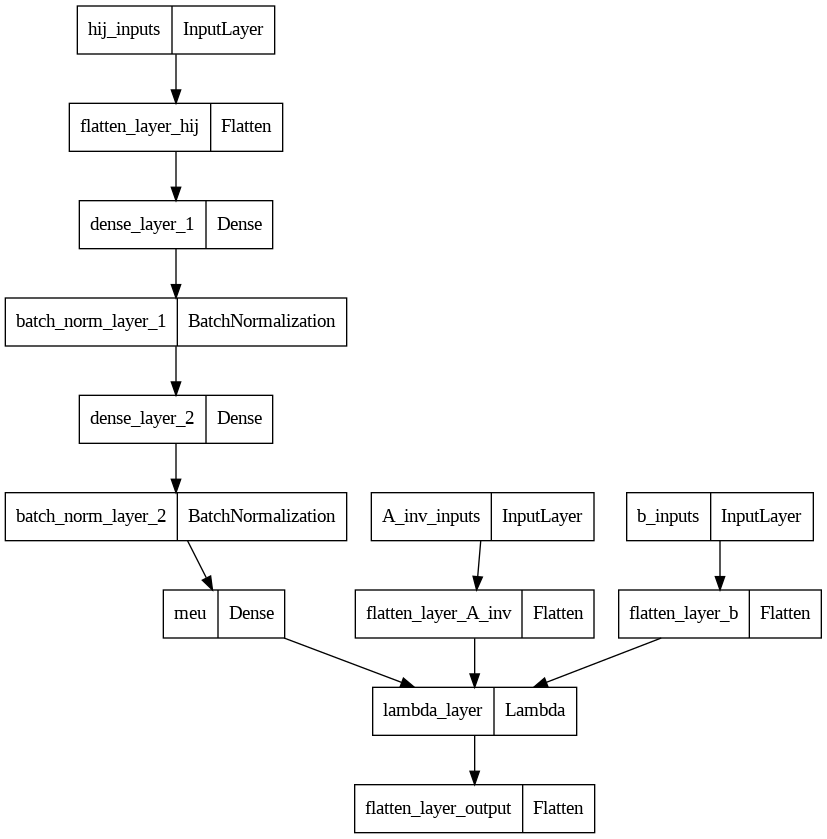

In [ ]:
## Plot the model as a graph
keras.utils.plot_model(model, "Functional_API_Model.png")

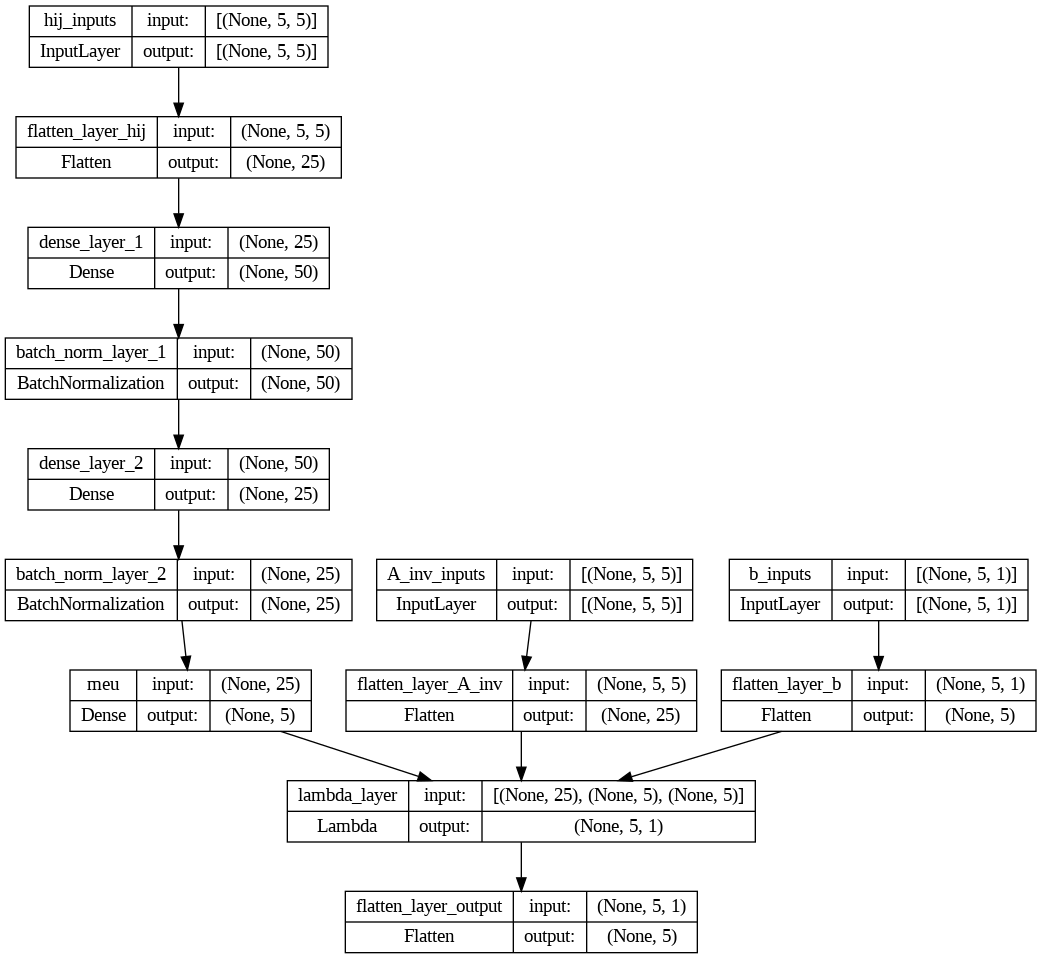

In [ ]:
## Display the input and output shapes of each layer
keras.utils.plot_model(model, "Functional_API_Model_with_shape_info.png", show_shapes=True)

In [ ]:
## Convert sigma_sqr_noise from numpy array to tensor
sigma_sqr_noise_t = tf.convert_to_tensor(sigma_sqr_noise, dtype = float)
tf.print(sigma_sqr_noise_t)

[0.1 0.1 0.1 0.1 0.1]


In [ ]:
## The customized loss function
def custom_loss(y_true, y_pred):
  # p = y_pred
  p = tf.math.multiply(p_max, y_pred)
  hij = tf.reshape(y_true[:,0:K*K], (-1,K,K))
  hij_abs_sqr = tf.math.square(tf.math.abs(hij))

  R_P = 0.0
  for i in range(K):  # Total rows
    ph = 0.0
    for j in range(K):  # Total columns
      ph_j = tf.math.multiply(p[:,j], hij_abs_sqr[:,i,j])
      ph = tf.math.add(ph, ph_j)
    
    numr = tf.math.multiply(p[:,i], hij_abs_sqr[:,i,i])
    dnumr = tf.math.add(sigma_sqr_noise_t[i], tf.math.subtract(ph, numr))
    SINR_i = tf.math.divide(numr, dnumr)
    R_P = tf.math.add(R_P, (tf.math.log(1 + SINR_i)/tf.math.log(2.0)))
  
  loss = -R_P
  loss = tf.reduce_mean(loss) # batch mean
  return loss

Epoch 1/100
206/206 [==============================] - 3s 8ms/step - loss: -2.3201 - val_loss: -2.4075
Epoch 2/100
206/206 [==============================] - 1s 5ms/step - loss: -2.4994 - val_loss: -2.5874
Epoch 3/100
206/206 [==============================] - 1s 4ms/step - loss: -2.6479 - val_loss: -2.7216
Epoch 4/100
206/206 [==============================] - 1s 5ms/step - loss: -2.7660 - val_loss: -2.8160
Epoch 5/100
206/206 [==============================] - 1s 4ms/step - loss: -2.8577 - val_loss: -2.8944
Epoch 6/100
206/206 [==============================] - 1s 4ms/step - loss: -2.9320 - val_loss: -2.9621
Epoch 7/100
206/206 [==============================] - 1s 5ms/step - loss: -2.9899 - val_loss: -3.0141
Epoch 8/100
206/206 [==============================] - 1s 5ms/step - loss: -3.0322 - val_loss: -3.0493
Epoch 9/100
206/206 [==============================] - 1s 5ms/step - loss: -3.0619 - val_loss: -3.0743
Epoch 10/100
206/206 [==============================] - 1s 5ms/step - los

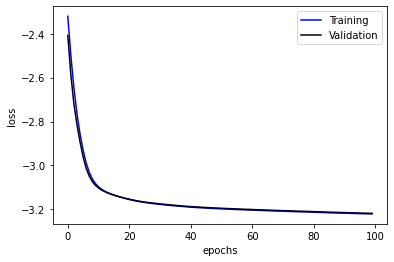

In [ ]:
## Build and compile the DNN model
## Training and Testing
# https://stackoverflow.com/questions/37232782/nan-loss-when-training-regression-network
import matplotlib.pyplot as plt

optA = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer = optA, loss = custom_loss)

train_input = [train_input_F_H, train_input_A_inv, train_input_b]
valid_input = [valid_input_F_H, valid_input_A_inv, valid_input_b]

history = model.fit(train_input, train_input_F_H, epochs = 100, validation_data = (valid_input, valid_input_F_H), batch_size = 1000)

plt.plot(history.epoch, history.history['loss'], color = "blue", label = "Training")
plt.plot(history.epoch, history.history['val_loss'], color="black", label = "Validation")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [ ]:
## Constraint violation probability and
## finding indexes of test_input_F_H matrix with the hij set that do not satisfy
## constraint on the minimum SINR_P_min rate but satisfy the maximum transmit
## power p_max

test_input = [test_input_F_H, test_input_A_inv, test_input_b]
# output_P_hat_temp = model.predict(test_input)
output_P_hat_temp = np.multiply(p_max, model.predict(test_input))
output_P_hat = output_P_hat_temp.reshape((output_P_hat_temp.shape[0], output_P_hat_temp.shape[1], 1)) # test_input_F_H_size X row X column
output_P_hat_size = output_P_hat.shape[0]
test_data_F_H_abs_sqr = cmplx_abs_sqr(test_data_F_H)

indx_n = []
count_v = 0

for k in range(output_P_hat_size):
  for i in range(K):  # Total rows
    ph = 0
    for j in range(K):  # Total columns
      ph_j = np.multiply(output_P_hat[k,j], test_data_F_H_abs_sqr[k,i,j])
      ph = ph + ph_j
    
    numr = np.multiply(output_P_hat[k,i], test_data_F_H_abs_sqr[k,i,i])
    dnumr = sigma_sqr_noise[i] + ph - numr
    SINR_out = np.divide(numr, dnumr)
    
    if np.round(SINR_out, decimals= 3) < SINR_P_min[i]:
      indx_n.append(k)
      count_v = count_v + 1
      # print(SINR_out)
      break

violation_prb = (count_v / output_P_hat_size) * 100
print("Constraints Violation Probability: {:.2f}%".format(violation_prb))
# print(len(indx_n))
# print(indx_n)

782/782 [==============================] - 1s 1ms/step
Constraints Violation Probability: 94.93%


In [ ]:
## Finding indexes of test_input_F_H matrix that satisfy constraints on both the 
## minimum SINR_P_min rate and the maximum transmit power Pmax
i = 0
indx_q = []

for k in range(output_P_hat_size):
  if k == indx_n[i]:
    i = i +1
    if  i == len(indx_n):
      i = i - 1
  else:
    indx_q.append(k)

print(len(indx_q))
# print(indx_q)

1267


In [ ]:
## H of test_input_F_H matrix that satisfy both constraint on the minimum
## SINR_P_min rate and p_max
Q_H_size = len(indx_q)
Q_H = np.empty((Q_H_size, K, K), dtype = complex, order = 'C')

for i in range(Q_H_size):
  j = indx_q[i]
  Q_H[i] = test_input_F_H[j]

print(Q_H.shape)
# print(Q_H)

(1267, 5, 5)


In [ ]:
##  P_Hat of output_P_hat matrix that satisfy both constraint on the minimum
## SINR_P_min rate and p_max
Q_P_Hat = np.empty((Q_H_size, K, 1), dtype = float, order = 'C')

for i in range(Q_H_size):
  j = indx_q[i]
  Q_P_Hat[i] = output_P_hat[j]

print(Q_P_Hat.shape)
# print(Q_P_Hat)

(1267, 5, 1)


In [ ]:
## Function to calculate the average sum rate
# Here, p_model is the output of DNN, and it is a 2D array.
import math

def average_sum_rate(hij, p_model, sigma_sqr_noise, K):
  R = 0
  hij_size = hij.shape[0]
  hij_abs_sqr = cmplx_abs_sqr(hij)

  for k in range(hij_size):
    for i in range(K):  # Total rows
      phn = 0
      for j in range(K):  # Total columns
        phn_j = np.multiply(p_model[k,j], hij_abs_sqr[k,i,j])
        phn = phn + phn_j
      
      numr_s = np.multiply(p_model[k,i], hij_abs_sqr[k,i,i])
      dnumr_s = sigma_sqr_noise[i] + phn - numr_s
      R_temp = math.log2(1 + np.divide(numr_s, dnumr_s))
      R = R + R_temp
  
  return (R/hij_size)

In [ ]:
# DNN Sum Rate for test_data_F_H
sumrate_F_H = average_sum_rate(test_data_F_H, output_P_hat, sigma_sqr_noise, K)
print("Average Sum Rate for all H matrices: {:.2f} Bit/Second/Hertz".format(sumrate_F_H))

Average Sum Rate for all H matrices: 3.21 Bit/Second/Hertz


In [ ]:
## DNN Sum Rate for only Q_H
sumrate_Q_H = average_sum_rate(Q_H, Q_P_Hat, sigma_sqr_noise, K)
print("Average Sum Rate for desired H matrices only: {:.2f} Bit/Second/Hertz".format(sumrate_Q_H))

Average Sum Rate for desired H matrices only: 4.22 Bit/Second/Hertz


In [ ]:
## Checking (A_inv x b), i.e., the power for negative values
count_n = 0
for c in range(output_P_hat_size):
  p_temp = np.matmul(test_input_A_inv[c], test_input_b[c])
  if np.any(p_temp < 0):
    count_n = count_n + 1
    print(c,'\n')
    print(p_temp)

print("Negative power count: ", count_n)

Negative power count:  0


In [ ]:
## Checking P_hat, i.e., the power for test_data_F_H for negative values
## and Heat Rate i.e. percentage for 0 <= P_hat <= p_max
count_p = 0
count_n = 0

for n in range(output_P_hat_size):
  P_max = np.amax(output_P_hat[n])
  if np.round(P_max, decimals = 3) <= 1:
    count_p = count_p + 1
  
  if np.any(output_P_hat[n] < 0):
    count_n = count_n + 1
    print(n,'\n')
    print(output_P_hat)

p_heat_rate = (count_p / output_P_hat_size) * 100
print("Heat Rate for Power : {:.2f}%".format(p_heat_rate))
print("Negative power count: ", count_n)

Heat Rate for Power : 100.00%
Negative power count:  0
